# Multi-Class Prediction

## Import the Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Gathering Data

*Load the train data table*

In [2]:
TRAIN_DT = pd.read_csv('csv/bmi_train.csv')
TRAIN_DT.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


*Load the validation data table*

In [3]:
VALIDATION_DT = pd.read_csv('csv/bmi_validation.csv')
VALIDATION_DT.head()

,Gender,Height,Weight
0,Male,161,103
1,Male,180,75
2,Male,174,95
3,Female,179,103
4,Female,192,140


## Assessing Data

In [4]:
TRAIN_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
VALIDATION_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  100 non-null    object
 1   Height  100 non-null    int64 
 2   Weight  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


*Looking for empty or null data/cell in dataset*

In [6]:
TRAIN_DT.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [7]:
VALIDATION_DT.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

*Looking for duplicated data in dataset*

In [8]:
TRAIN_DT.duplicated().sum()

8

In [9]:
VALIDATION_DT.duplicated().sum()

0

## Preprocessing and Cleaning the Data

*Making copy of datasets and drop all the duplicates data in train dataset*

In [10]:
train_dt_c = TRAIN_DT.copy()
train_dt_c.drop_duplicates(inplace=True)

valid_dt_c = VALIDATION_DT.copy()

*Using map function to encoding the gender feature with numerical type, 0 for male and 1 for female*

In [11]:
train_dt_c['Gender'] = train_dt_c['Gender'].map({'Male': 0, 'Female': 1})
valid_dt_c['Gender'] = valid_dt_c['Gender'].map({'Male': 0, 'Female': 1})

*Using StandardScaler function from sklearn to feature scalling the height and weight*

In [12]:
# Apply feature scaling to weight and height
scaler = StandardScaler()
scaler.fit(train_dt_c[['Weight', 'Height']])  # Fit only on training data

# Transform both training and validation data
train_dt_c[['Weight', 'Height']] = scaler.transform(train_dt_c[['Weight', 'Height']])
valid_dt_c[['Weight', 'Height']] = scaler.transform(valid_dt_c[['Weight', 'Height']])

*Separate the features and label for train dataset*

In [13]:
X = train_dt_c.drop('Index', axis=1)
Y = train_dt_c['Index']

*Split the data into 70% Train, 15% Valid and 15% Test*

In [14]:
# Split the dataset into training and temp (validation + test)
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Split the temp dataset into validation and test sets
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
x_train.head()

,Gender,Height,Weight
110,0,-1.044882,-1.115680
17,0,-0.321750,1.502240
324,1,0.401381,-1.392872
24,1,-1.044882,-0.869288
128,0,-1.225665,-0.992484


In [16]:
y_train.head()

110    3
17     5
324    2
24     2
128    4
Name: Index, dtype: int64

## Exploring the data

In [17]:
x_train.describe(include="all")

,Gender,Height,Weight
count,274.000000,274.000000,274.000000
mean,0.496350,-0.053875,0.015792
std,0.500902,0.979788,0.993913
min,0.000000,-1.828274,-1.731662
25%,0.000000,-0.864099,-0.799990
50%,0.000000,-0.080707,0.039285
75%,1.000000,0.762947,0.978656
max,1.000000,1.666861,1.656235


In [18]:
y_train.describe(include="all")

count    274.000000
mean       3.788321
std        1.322838
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64

In [19]:
valid_dt_c.describe(include="all")

,Gender,Height,Weight
count,100.00,100.000000,100.000000
mean,0.55,-0.124697,-0.014306
std,0.50,0.935359,1.004856
min,0.00,-1.768013,-1.700863
25%,0.00,-0.864099,-0.915486
50%,1.00,-0.140968,-0.083912
75%,1.00,0.597229,0.893959
max,1.00,1.606600,1.656235


In [20]:
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

print ('\nThe shape of validation dataset is: ' + str(valid_dt_c.shape))
print ('We have m = %d validation examples' % (len(valid_dt_c)))

The shape of X_train is: (274, 3)
The shape of y_train is: (274,)
We have m = 274 training examples

The shape of validation dataset is: (100, 3)
We have m = 100 validation examples


## Visualize the Data

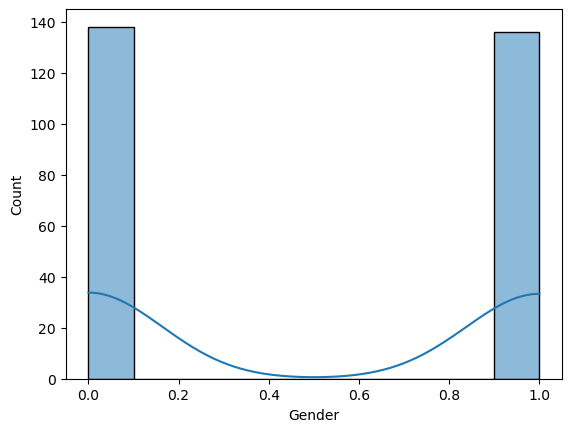

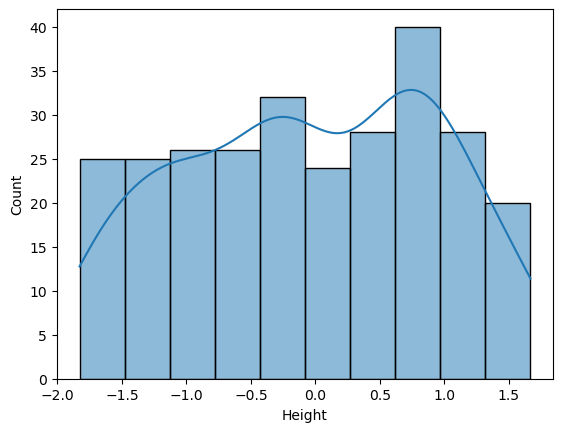

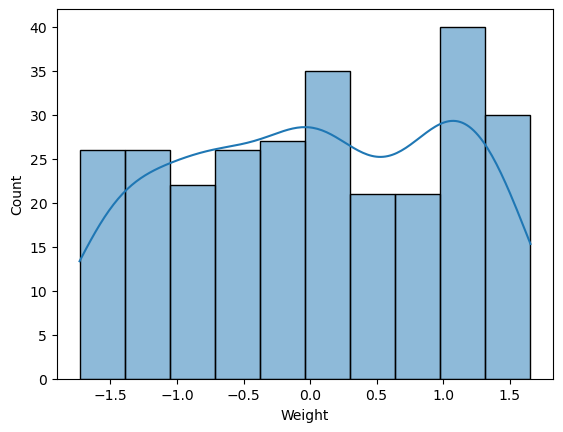

In [21]:
data = x_train['Gender']

# Histogram
sns.histplot(data, kde=True)
plt.show()

data = x_train['Height']

# Histogram
sns.histplot(data, kde=True)
plt.show()

data = x_train['Weight']

# Histogram
sns.histplot(data, kde=True)
plt.show()

## Training the Data

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(1e-3))
    ]) 
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,918 (11.40 KB)

 Trainable params: 2,726 (10.65 KB)

 Non-trainable params: 192 (768.00 B)

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Can be changed to 'val_accuracy' if focusing on accuracy
    patience=10, 
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=95,
    callbacks=[early_stopping]
)

Epoch 1/95
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.2138 - loss: 2.6773 - val_accuracy: 0.2203 - val_loss: 1.8534
Epoch 2/95
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3361 - loss: 1.9552 - val_accuracy: 0.4407 - val_loss: 1.7390
Epoch 3/95
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4434 - loss: 1.6336 - val_accuracy: 0.5763 - val_loss: 1.6395
Epoch 4/95
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5575 - loss: 1.3706 - val_accuracy: 0.5932 - val_loss: 1.5553
Epoch 5/95
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6276 - loss: 1.1289 - val_accuracy: 0.5763 - val_loss: 1.4879
Epoch 6/95
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6214 - loss: 1.2040 - val_accuracy: 0.5763 - val_loss: 1.4319
Epoch 7/95
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6002 - loss: 1.1496 - val_accuracy: 0.5593 - val_loss: 1.3816
Epoch 8/95
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6505 - loss: 0.9573 - val_accuracy: 0.5593 - val_loss: 1.3338
Epoch 9

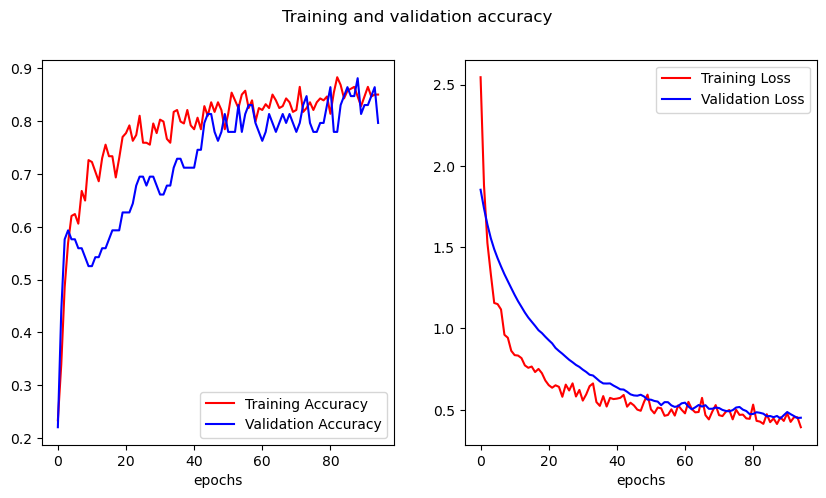

In [26]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [28]:
y_pred = model.predict(x_test)

y_pred_class = np.argmax(y_pred, axis=1)

accuracy = np.mean(y_test == y_pred_class)

print(f'Accuracy: {accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 84.75%
